## This notebook relates to ticket [GOATS-1184](https://noirlab.atlassian.net/browse/GOATS-1184)

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import astropy.units as u

from antares_client.search import get_by_id #get_by_ztf_object_id, get_by_lsst_dia_object_id

### Pull an example locus 

In [2]:
# Lookup by ANTARES ID

locus = get_by_id("ANT2019dxdb6")

In [3]:
light_curve = locus.timeseries

In [6]:
light_curve[['ant_mjd','ant_mag','ant_magerr','ant_maglim','ant_passband']]

ant_mjd,ant_mag,ant_magerr,ant_maglim,ant_passband
float64,float64,float64,float64,str1
58742.12847220013,--,--,18.689899444580078,g
58743.1266319002,--,--,20.828500747680664,g
58745.20548610017,--,--,20.401899337768555,g
58745.33743060008,--,--,19.520999908447266,R
58746.138182899915,--,--,20.300600051879883,g
58749.26841440005,--,--,20.354999542236328,R
58749.26978009986,--,--,20.551700592041016,R
58754.128541700076,--,--,20.575300216674805,R
58754.26434030011,--,--,20.28730010986328,g


In [7]:
light_curve['ant_magerr'].mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

#### Extract and plot the limit if magerr is masked, otherwise plot the mag with error

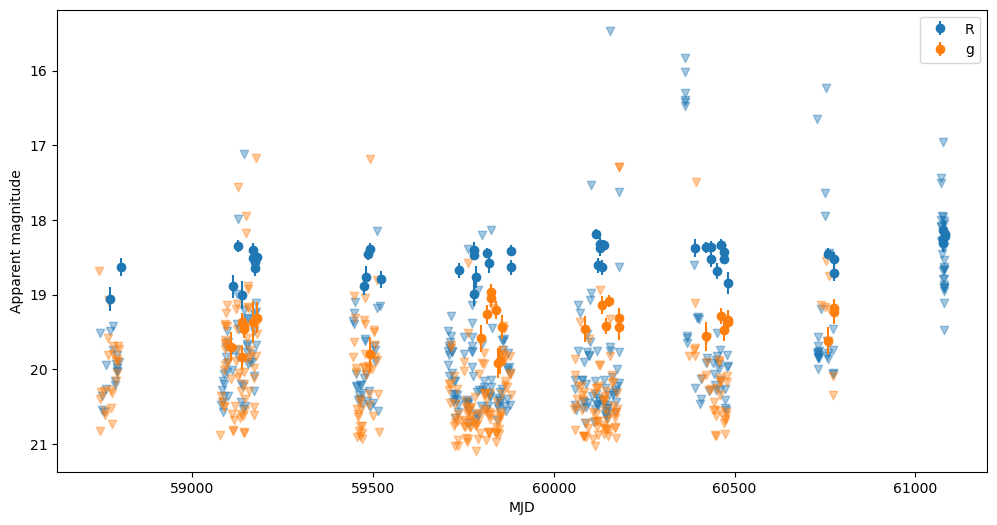

In [17]:
plt.close('all')
fig, ax = plt.subplots(figsize=(12,6))

## plot detections for each passband with errorbars
temp = light_curve[~light_curve['ant_magerr'].mask]

for PB in np.unique(temp['ant_passband'].data):
    mm = temp['ant_passband'].data == PB
    ax.errorbar(temp['ant_mjd'].data[mm], temp['ant_mag'].data[mm], yerr=temp['ant_magerr'].data[mm], fmt='o', linestyle='None', label=PB)

## plot limits
temp = light_curve[light_curve['ant_magerr'].mask]

for PB in np.unique(temp['ant_passband'].data):
    mm = temp['ant_passband'].data == PB
    ax.scatter(temp['ant_mjd'].data[mm], temp['ant_maglim'].data[mm], marker='v', alpha=0.4) ## make sure to use the same color for detections and limits. I'm not checking that here


ax.set_ylim(ax.get_ylim()[::-1]) # reverse y-axis as it's mag
ax.set_xlabel('MJD')
ax.set_ylabel('Apparent magnitude')
plt.legend()
plt.show()